--- Sales Summary ---
     product  total_qty  revenue
0  Keyboard          5    250.0
1    Laptop          3   2400.0
2   Monitor          3    600.0
3     Mouse         15    300.0


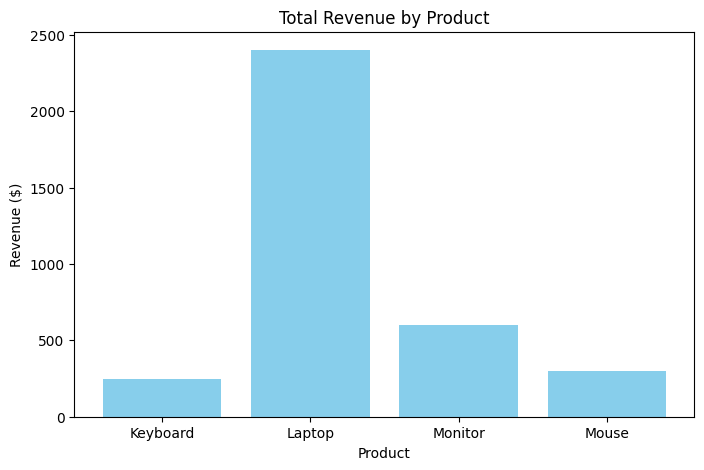

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files  # Needed to download files from Colab

# --- 1. Database Setup & Data Insertion ---
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()
cursor.execute('CREATE TABLE IF NOT EXISTS sales (id INTEGER PRIMARY KEY, product TEXT, quantity INTEGER, price REAL)')
cursor.execute('DELETE FROM sales') # Clear old data
data = [('Laptop', 2, 800), ('Mouse', 10, 20), ('Keyboard', 5, 50), ('Laptop', 1, 800), ('Mouse', 5, 20), ('Monitor', 3, 200)]
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', data)
conn.commit()

# --- 2. SQL Analysis ---
query = "SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product"
df = pd.read_sql_query(query, conn)
print("--- Sales Summary ---\n", df)

# --- 3. Visualization ---
plt.figure(figsize=(8, 5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.title('Total Revenue by Product'); plt.xlabel('Product'); plt.ylabel('Revenue ($)')
plt.savefig("sales_chart.png") # Saves image
plt.show() # Shows image in Colab
conn.close()

# --- 4. Download Files for GitHub Submission ---
print("Downloading files for your GitHub submission...")
files.download('sales_data.db')
files.download('sales_chart.png')